In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving hotel_bookings(2).csv to hotel_bookings(2).csv


In [193]:
df = pd.read_csv("hotel_bookings(2).csv")

**Пункт 1**

In [194]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Исследуем наши данные:

In [195]:
columns = df.columns
columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [196]:
for i in columns:
  print(i,len(pd.unique(df[i])))


hotel 2
is_canceled 2
lead_time 479
arrival_date_year 3
arrival_date_month 12
arrival_date_week_number 53
arrival_date_day_of_month 31
stays_in_weekend_nights 17
stays_in_week_nights 35
adults 14
children 6
babies 5
meal 5
country 178
market_segment 8
distribution_channel 5
is_repeated_guest 2
previous_cancellations 15
previous_bookings_not_canceled 73
reserved_room_type 10
assigned_room_type 12
booking_changes 21
deposit_type 3
agent 334
company 353
days_in_waiting_list 128
customer_type 4
adr 8879
required_car_parking_spaces 5
total_of_special_requests 6
reservation_status 3
reservation_status_date 926


In [197]:
df = df.drop(['reservation_status_date'], axis = 1)

In [198]:

df = df.drop(['adr'], axis=1)

In [199]:
print("размер: " , df.shape,'\n')
print("__________информация:____________")
print(df.info(),'\n')
print("__________типы:___________")
print(df.dtypes,'\n')
print("__________пустые значения:____________")
print(df.isna().sum())

размер:  (119390, 30) 

__________информация:____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies              

In [200]:
#удалим company так как 112593 пустых значений из 119390

In [201]:
df = df.drop(['company'], axis=1)
print(df.isna().sum())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [202]:
value = df['agent'].mean()
df['agent'] = df['agent'].fillna(value)

In [203]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
required_car

In [204]:
df = df.dropna()
print("___________После обработки всех пустых значений______________")
print(df.isna().sum())

___________После обработки всех пустых значений______________
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
re

In [205]:
df = df.drop(['country'], axis = 1)

In [206]:
df = df.drop(['arrival_date_month','reserved_room_type','assigned_room_type'], axis = 1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,...,0,0,3,No Deposit,86.693382,0,Transient,0,0,Check-Out
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,...,0,0,4,No Deposit,86.693382,0,Transient,0,0,Check-Out
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,...,0,0,0,No Deposit,86.693382,0,Transient,0,0,Check-Out
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,No Deposit,304.000000,0,Transient,0,0,Check-Out
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,No Deposit,240.000000,0,Transient,0,1,Check-Out


In [207]:
#df[['lead_time','hotel']].iloc[2:5]

In [208]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2015,27,1,0,0,2,0.0,...,0,0,3,No Deposit,86.693382,0,Transient,0,0,Check-Out
1,Resort Hotel,0,737,2015,27,1,0,0,2,0.0,...,0,0,4,No Deposit,86.693382,0,Transient,0,0,Check-Out
2,Resort Hotel,0,7,2015,27,1,0,1,1,0.0,...,0,0,0,No Deposit,86.693382,0,Transient,0,0,Check-Out
3,Resort Hotel,0,13,2015,27,1,0,1,1,0.0,...,0,0,0,No Deposit,304.000000,0,Transient,0,0,Check-Out
4,Resort Hotel,0,14,2015,27,1,0,2,2,0.0,...,0,0,0,No Deposit,240.000000,0,Transient,0,1,Check-Out


In [209]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder() 

#label_encoder.fit(df['hotel']) 
#df['hotel'] = label_encoder.transform(df['hotel']) 

#df.head()

In [210]:
df = pd.get_dummies(df, columns = ['hotel','meal','market_segment','distribution_channel','deposit_type','customer_type','reservation_status'])
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,2015,27,1,0,0,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,737,2015,27,1,0,0,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,7,2015,27,1,0,1,1,0.0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,1,0,0,0,0,1,0,0,1,0


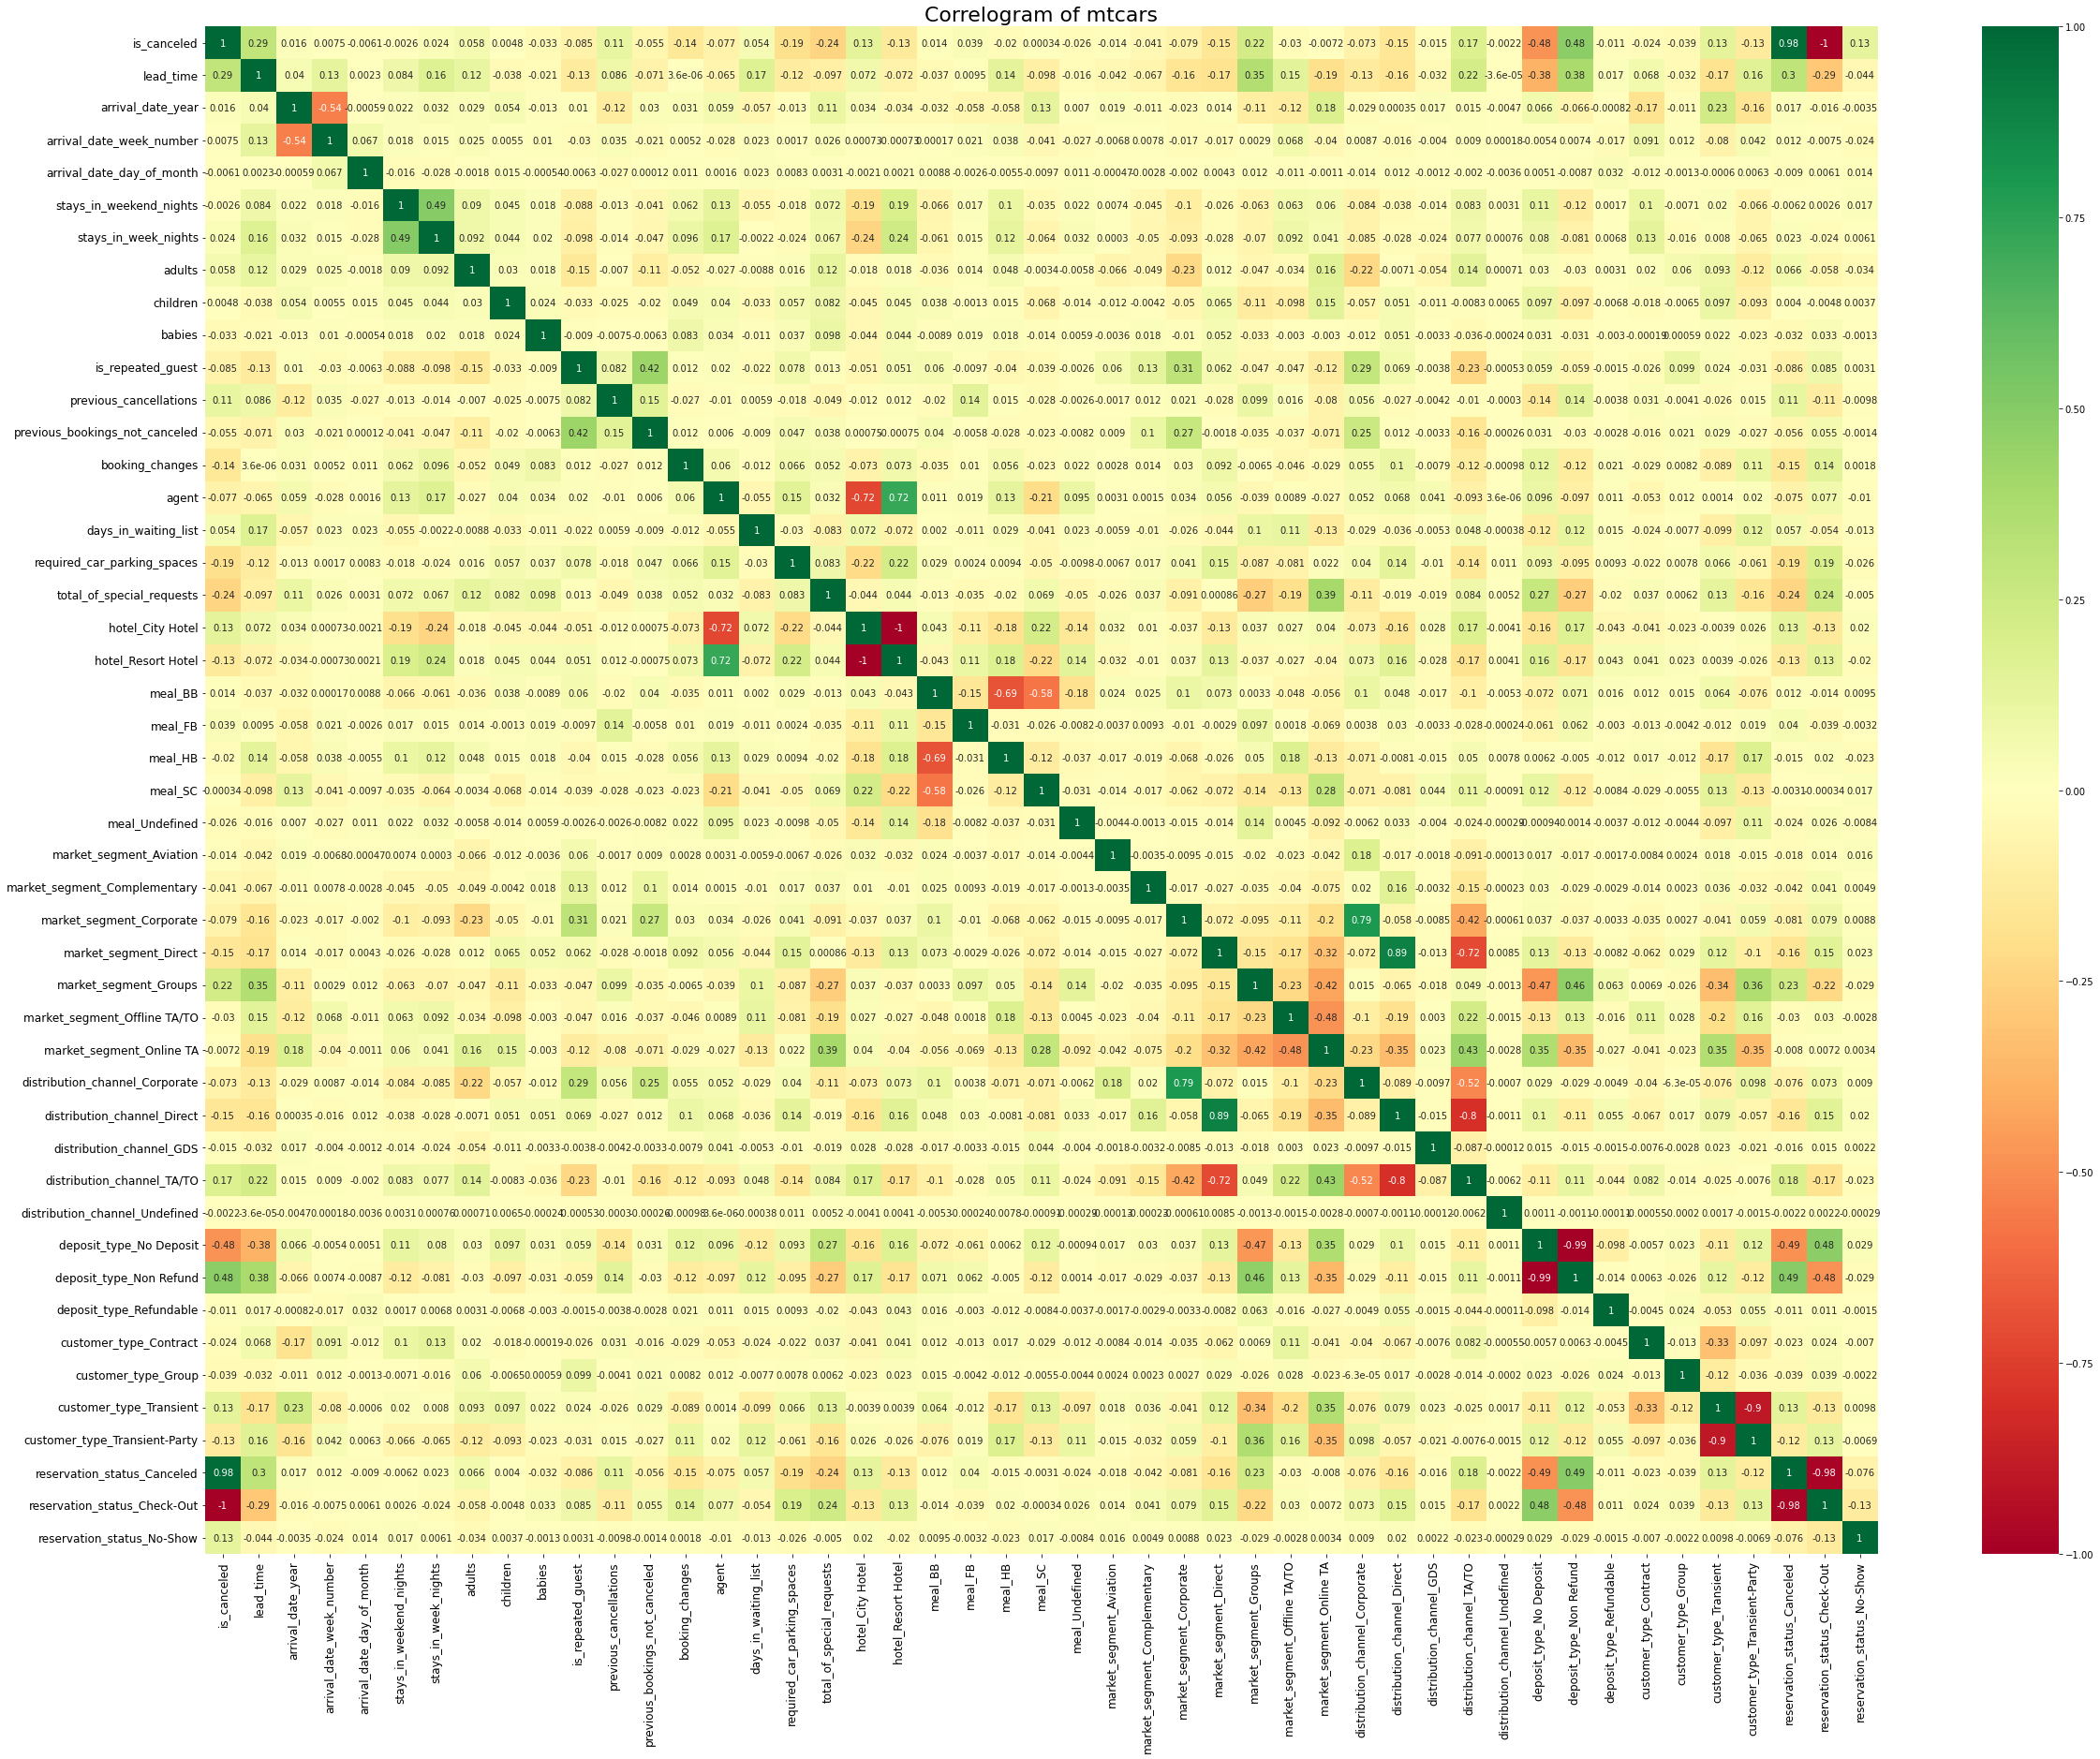

In [211]:
import seaborn as sns
corel = df.corr()
corel

plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Пункты 2 и 3**

In [221]:
y = df['is_canceled']
X = pd.DataFrame(df['reservation_status_Check-Out'])

In [222]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, y_train)
answers_pred = model.predict(X_test)

**Пункт 4**

In [223]:
model.coef_

array([[-15.69490294]])

In [224]:
model.intercept_

array([7.58122783])

In [225]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,answers_pred))

1.0


In [226]:
print(X_train.shape)
print(y_train.shape)

(83228, 1)
(83228,)


**Пункт 5**

In [227]:
X.columns

Index(['reservation_status_Check-Out'], dtype='object')

In [228]:
print("Y =", model.intercept_[0], end='')
w = model.coef_
for i in range(w[0].shape[0]):
  print('+', w[0][i], X.columns[i], end = ' ')

Y = 7.581227834022933+ -15.694902937287882 reservation_status_Check-Out 

**Пункт 6**

In [229]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)

array([[22311,     0],
       [    0, 13359]])

In [230]:
df_y = pd.DataFrame(y_test)
df_y.value_counts()

is_canceled
0              22311
1              13359
dtype: int64

In [231]:
tn, fp, fn, tp = confusion_matrix(y_test, answers_pred).ravel()
print("TN:", tn) # - true positive
print("FP:", fp) # - false positive
print("FN:", fn) # - false negative
print("TP:", tp) # - true negative

TN: 22311
FP: 0
FN: 0
TP: 13359


**Пункт 7**

In [232]:
accuracy_vruch = (tp + tn)/(tp + tn + fn + fp)
accuracy_vruch

1.0

In [233]:
#полнота, чем выше полнота, тем меньше ложных пропусков
recall_vruch = (tp)/(tp + fn)
recall_vruch

1.0

In [234]:
#точность, чем выше точность, тем меньше ложных срабатываний
precision_vruch = (tp)/(tp + fp)
precision_vruch

1.0

In [235]:
#F мера
f1_vruch = 2*(precision_vruch*recall_vruch)/(precision_vruch + recall_vruch)
f1_vruch

1.0

**Пункт 8**

In [236]:
print("accuracy " , accuracy_score(y_test, answers_pred))
print("recall " , recall_score(y_test, answers_pred))
print("precision " , precision_score(y_test, answers_pred))
print("f1: " , f1_score(y_test, answers_pred))

accuracy  1.0
recall  1.0
precision  1.0
f1:  1.0


In [239]:
#у этого набора данных есть особенность в том, что существует переменная у которой коэффициент корреляции с target = -1,
#скорее всего при создании набора данных не планировалось использование переменной is_canceled как целевой

In [237]:
#старые метрики на всех признаках
#accuracy  0.9969161760583123
#recall  0.993131038647343
#precision  0.9985579842137219
#f1:  0.9958371177717227

**Вывод: метрики получились хорошие, скорее всего из-за большого количества входных данных **